In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
exchange_path = sorted(glob.glob('./../data/exchange/*'))
exchange = pd.read_csv(exchange_path[5])
exchange_CAD = exchange.iloc[22:]
exchange_CAD = exchange_CAD.reset_index().drop('index', axis = 1)
exchange_CAD = exchange_CAD.drop('Unnamed: 0', axis = 1)
exchange_CAD

,date,buy,standard
0,2022-03-31,986.89,970.15
1,2022-03-30,988.16,976.56
2,2022-03-29,993.60,979.11
3,2022-03-28,1000.83,975.93
4,2022-03-25,990.37,973.30
...,...,...,...
4595,2003-09-30,869.25,850.17
4596,2003-09-29,862.23,850.62
4597,2003-09-26,867.33,853.30
4598,2003-09-25,870.15,853.83


In [3]:
a = exchange_CAD['buy'].iloc[1:].to_numpy()
b = exchange_CAD['buy'].iloc[:len(exchange_CAD)-1].to_numpy()
ex = (b-a)/a*100
exchange_CAD = exchange_CAD.drop(4599)
exchange_CAD['ex'] = ex # % 데이터
exchange_CAD['ex'].isnull().sum()
exchange_CAD

,date,buy,standard,ex
0,2022-03-31,986.89,970.15,-0.128522
1,2022-03-30,988.16,976.56,-0.547504
2,2022-03-29,993.60,979.11,-0.722400
3,2022-03-28,1000.83,975.93,1.056171
4,2022-03-25,990.37,973.30,-0.249786
...,...,...,...,...
4594,2003-10-01,870.67,851.13,0.163359
4595,2003-09-30,869.25,850.17,0.814168
4596,2003-09-29,862.23,850.62,-0.588011
4597,2003-09-26,867.33,853.30,-0.324082


In [4]:
import datetime
exchange_CAD['dt'] = pd.to_datetime(exchange_CAD['date'])
exchange_CAD['dt'] = exchange_CAD['dt'].dt.strftime('%Y-%m')
exchange_CAD

,date,buy,standard,ex,dt
0,2022-03-31,986.89,970.15,-0.128522,2022-03
1,2022-03-30,988.16,976.56,-0.547504,2022-03
2,2022-03-29,993.60,979.11,-0.722400,2022-03
3,2022-03-28,1000.83,975.93,1.056171,2022-03
4,2022-03-25,990.37,973.30,-0.249786,2022-03
...,...,...,...,...,...
4594,2003-10-01,870.67,851.13,0.163359,2003-10
4595,2003-09-30,869.25,850.17,0.814168,2003-09
4596,2003-09-29,862.23,850.62,-0.588011,2003-09
4597,2003-09-26,867.33,853.30,-0.324082,2003-09


In [5]:
interest_path = sorted(glob.glob('./../data/interest/*'))
interest_path[-2]

'./../data/interest/40_south-korea_government_bond_rate_1year.csv'

In [6]:
interest_path = sorted(glob.glob('./../data/interest/*'))
interest_Canada = pd.read_csv(interest_path[3])
interest_Korea = pd.read_csv(interest_path[-2])
interest_CAD = interest_Canada.iloc[26:]
interest_KOR = interest_Korea.iloc[49:-658]
interest_CAD, interest_KOR

(      Unnamed: 0        date  interest  change
 26            26  2022-03-31      1.96   -1.01
 27            27  2022-03-30      1.98    6.45
 28            28  2022-03-29      1.86    0.54
 29            29  2022-03-28      1.85    1.09
 30            30  2022-03-25      1.83    5.78
 ...          ...         ...       ...     ...
 5072        4995  2003-09-30      2.59   -2.26
 5073        4996  2003-09-29      2.65    1.15
 5074        4997  2003-09-26      2.62   -0.38
 5075        4998  2003-09-25      2.63    0.38
 5076        4999  2003-09-24      2.62   -0.38
 
 [5051 rows x 4 columns],
       Unnamed: 0        date  interest  change
 49            49  2022-03-31     1.675    1.39
 50            50  2022-03-30     1.652   -0.12
 51            51  2022-03-29     1.654   -0.36
 52            52  2022-03-28     1.660    6.14
 53            53  2022-03-27     1.564    0.00
 ...          ...         ...       ...     ...
 4780        4337  2003-12-12     4.640   -0.43
 4781       

In [7]:
start_date = pd.to_datetime(exchange_CAD.iloc[-1,0]) ## 시작 날짜
end_date = pd.to_datetime(exchange_CAD.iloc[0,0]) ## 마지막 날짜
 
dates = pd.date_range(start_date,end_date,freq='D')
padding = pd.DataFrame({'date' : dates})
padding = padding.sort_values(by = 'date', ascending = False).reset_index().drop('index', axis = 1)
padding['date'] = padding['date'].dt.strftime('%Y-%m-%d')
padding

,date
0,2022-03-31
1,2022-03-30
2,2022-03-29
3,2022-03-28
4,2022-03-27
...,...
6758,2003-09-29
6759,2003-09-28
6760,2003-09-27
6761,2003-09-26


In [8]:
interest_CAD_r = interest_CAD[['date', 'interest']]
interest_CAD_r = interest_CAD_r.rename(columns = {'interest' : 'int_CAD'})

interest_KOR_r = interest_KOR[['date', 'interest']]
interest_KOR_r = interest_KOR_r.rename(columns = {'interest' : 'int_KOR'})

In [9]:
padding_temp = pd.merge(padding,interest_CAD_r, on = 'date', how = 'outer')
padding_temp

,date,int_CAD
0,2022-03-31,1.96
1,2022-03-30,1.98
2,2022-03-29,1.86
3,2022-03-28,1.85
4,2022-03-27,NaN
...,...,...
6759,2003-09-28,NaN
6760,2003-09-27,NaN
6761,2003-09-26,2.62
6762,2003-09-25,2.63


In [10]:
padding_merge = pd.merge(padding_temp,interest_KOR_r, on = 'date', how = 'outer')
padding_merge

,date,int_CAD,int_KOR
0,2022-03-31,1.96,1.675
1,2022-03-30,1.98,1.652
2,2022-03-29,1.86,1.654
3,2022-03-28,1.85,1.660
4,2022-03-27,NaN,1.564
...,...,...,...
6760,2003-09-27,NaN,NaN
6761,2003-09-26,2.62,NaN
6762,2003-09-25,2.63,NaN
6763,2003-09-24,2.62,NaN


In [11]:
padding_null = padding_merge.notnull()
padding_null

,date,int_CAD,int_KOR
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,False,True
...,...,...,...
6760,True,False,False
6761,True,True,False
6762,True,True,False
6763,True,True,False


In [12]:
# for i in range(len(padding_merge)-2,-1,-1):
if not padding_null['int_KOR'][6763]:
    print('널값이다!')

널값이다!


In [13]:
for i in range(len(padding_merge)-2,-1,-1): # 6763부터 시작
    if not padding_null['int_CAD'][i]:
        padding_merge['int_CAD'][i] = padding_merge['int_CAD'][i+1]
    if not padding_null['int_KOR'][i]:
        padding_merge['int_KOR'][i] = padding_merge['int_KOR'][i+1]
padding_merge

/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_12201/3194149557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padding_merge['int_KOR'][i] = padding_merge['int_KOR'][i+1]
/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_12201/3194149557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padding_merge['int_CAD'][i] = padding_merge['int_CAD'][i+1]


,date,int_CAD,int_KOR
0,2022-03-31,1.96,1.675
1,2022-03-30,1.98,1.652
2,2022-03-29,1.86,1.654
3,2022-03-28,1.85,1.660
4,2022-03-27,1.83,1.564
...,...,...,...
6760,2003-09-27,2.62,4.140
6761,2003-09-26,2.62,4.140
6762,2003-09-25,2.63,4.140
6763,2003-09-24,2.62,4.140


In [14]:
padding_merge['int_spread'] = padding_merge['int_KOR'] - padding_merge['int_CAD']
padding_merge

,date,int_CAD,int_KOR,int_spread
0,2022-03-31,1.96,1.675,-0.285
1,2022-03-30,1.98,1.652,-0.328
2,2022-03-29,1.86,1.654,-0.206
3,2022-03-28,1.85,1.660,-0.190
4,2022-03-27,1.83,1.564,-0.266
...,...,...,...,...
6760,2003-09-27,2.62,4.140,1.520
6761,2003-09-26,2.62,4.140,1.520
6762,2003-09-25,2.63,4.140,1.510
6763,2003-09-24,2.62,4.140,1.520


In [15]:
exchange_CAD

,date,buy,standard,ex,dt
0,2022-03-31,986.89,970.15,-0.128522,2022-03
1,2022-03-30,988.16,976.56,-0.547504,2022-03
2,2022-03-29,993.60,979.11,-0.722400,2022-03
3,2022-03-28,1000.83,975.93,1.056171,2022-03
4,2022-03-25,990.37,973.30,-0.249786,2022-03
...,...,...,...,...,...
4594,2003-10-01,870.67,851.13,0.163359,2003-10
4595,2003-09-30,869.25,850.17,0.814168,2003-09
4596,2003-09-29,862.23,850.62,-0.588011,2003-09
4597,2003-09-26,867.33,853.30,-0.324082,2003-09


In [16]:
inflation_Canada = pd.read_excel('./../data/2차/inflation/inflation.xlsx')
data = inflation_Canada.iloc[3, 646:]
index = inflation_Canada.iloc[1, 646:]
index = inflation_Canada.iloc[1, 646:]

In [21]:
inflation_Korea = pd.read_excel('./../data/1차/imf 한미일 물가 지수.xlsx')
inf_KOR = inflation_Korea.iloc[5, 56:].values
b = inf_KOR[1:]
a = inf_KOR[ :len(inf_KOR)-1]
inf_KOR = (b-a)/a*100

In [22]:
liquidity_KOR = pd.read_excel('./../data/2차/Liquidity/korea_Liquidity.xlsx')
liquidity_KOR = liquidity_KOR.iloc[[6,7], 12:len(liquidity_KOR.columns) - 1]
liquidity_KOR

,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,...,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235
6,2003M08,2003M09,2003M10,2003M11,2003M12,2004M01,2004M02,2004M03,2004M04,2004M05,...,2021M06,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03
7,136123.702941,141472.189772,143245.490267,150272.828765,155284.241118,157374.510531,162935.078208,163487.807592,163568.78933,166471.298235,...,448131.287768,452713.795151,457985.994959,457948.887899,463271.289451,457996.289518,457169.379937,455583.882483,455833.577101,451865.372152


In [23]:
b = liquidity_KOR.iloc[1,1:].to_numpy()
a = liquidity_KOR.iloc[1, :len(liquidity_KOR.columns)-1].to_numpy()
li_KOR = (b-a)/a*100

In [24]:
liquidity_CAD = pd.read_excel('./../data/2차/Liquidity/canada_Liquidity.xlsx')
liquidity_CAD = liquidity_CAD.iloc[[6,7], 48:]

In [26]:
date = liquidity_CAD.iloc[0, 1:]
b = liquidity_CAD.iloc[1,1:].to_numpy()
a = liquidity_CAD.iloc[1, :len(liquidity_CAD)-1].to_numpy()
li = (b-a)/a*100
li_df = pd.DataFrame({'date' : date, 'li_CAD': li, 'li_KOR':li_KOR})
li_df['li_spread'] = li_df['li_KOR'] - li_df['li_CAD']
li_df

,date,li_CAD,li_KOR,li_spread
Unnamed: 49,2003M09,3.934947,3.929137,-0.00581
Unnamed: 50,2003M10,1.600983,1.253462,-0.347521
Unnamed: 51,2003M11,2.35468,4.905801,2.55112
Unnamed: 52,2003M12,2.831679,3.334876,0.503197
Unnamed: 53,2004M01,3.119304,1.346092,-1.773211
...,...,...,...,...
Unnamed: 267,2021M11,194.187617,-1.138642,-195.326258
Unnamed: 268,2021M12,202.671892,-0.180549,-202.852442
Unnamed: 269,2022M01,196.389727,-0.346807,-196.736534
Unnamed: 270,2022M02,192.094342,0.054808,-192.039535


In [28]:
monthly = pd.DataFrame({'index' : index, 'inf_CAD': data, 'inf_KOR' : inf_KOR})
monthly['dt'] = monthly['index'].str[:4] + '-' + monthly['index'].str[5:]
monthly['dt'] = pd.to_datetime(monthly['dt'])
monthly['dt'] = monthly['dt'].dt.strftime('%Y-%m')
monthly['inf_spread'] = monthly['inf_KOR'] - monthly['inf_CAD']
monthly['m1_spread'] = li_df['li_spread'].values
monthly

,index,inf_CAD,inf_KOR,dt,inf_spread,m1_spread
Unnamed: 646,2003M09,0.194363,0.904861,2003-09,0.710497,-0.00581
Unnamed: 647,2003M10,-0.29098,0.087972,2003-10,0.378952,-0.347521
Unnamed: 648,2003M11,0.291829,-0.178625,2003-11,-0.470453,2.55112
Unnamed: 649,2003M12,0.096993,0.450201,2003-12,0.353208,0.503197
Unnamed: 650,2004M01,0.096899,0.624912,2004-01,0.528012,-1.773211
...,...,...,...,...,...,...
Unnamed: 864,2021M11,0.208478,0.503145,2021-11,0.294667,-195.326258
Unnamed: 865,2021M12,-0.138696,0.163666,2021-12,0.302362,-202.852442
Unnamed: 866,2022M01,0.902778,0.62476,2022-01,-0.278018,-196.736534
Unnamed: 867,2022M02,1.032347,0.582673,2022-02,-0.449674,-192.039535


In [29]:
inflation_spread_list = monthly['inf_spread'].to_list()
liquidity_spread_list = monthly['m1_spread'].to_list()
monthly_index_list = monthly['dt'].to_list()
exchange_CAD['inf_spread'] = 'nan'
exchange_CAD['m1_spread'] = 'nan'
for i in range(len(exchange_CAD)):
    try:
        exchange_CAD['inf_spread'][i] = inflation_spread_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
        exchange_CAD['m1_spread'][i] = liquidity_spread_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
    except: print(f'{i}외왆되?')
exchange_CAD

/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_12201/1274888129.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_CAD['inf_spread'][i] = inflation_spread_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]
/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_12201/1274888129.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_CAD['m1_spread'][i] = liquidity_spread_list[monthly_index_list.index(exchange_CAD.iloc[i,4])]


,date,buy,standard,ex,dt,inf_spread,m1_spread
0,2022-03-31,986.89,970.15,-0.128522,2022-03,-0.70877,-195.447418
1,2022-03-30,988.16,976.56,-0.547504,2022-03,-0.70877,-195.447418
2,2022-03-29,993.60,979.11,-0.722400,2022-03,-0.70877,-195.447418
3,2022-03-28,1000.83,975.93,1.056171,2022-03,-0.70877,-195.447418
4,2022-03-25,990.37,973.30,-0.249786,2022-03,-0.70877,-195.447418
...,...,...,...,...,...,...,...
4594,2003-10-01,870.67,851.13,0.163359,2003-10,0.378952,-0.347521
4595,2003-09-30,869.25,850.17,0.814168,2003-09,0.710497,-0.00581
4596,2003-09-29,862.23,850.62,-0.588011,2003-09,0.710497,-0.00581
4597,2003-09-26,867.33,853.30,-0.324082,2003-09,0.710497,-0.00581


In [30]:
left = exchange_CAD[['date', 'ex', 'inf_spread', 'm1_spread']]
right = padding_merge[['date', 'int_spread']]
merge_df = pd.merge(left,right, on = 'date', how = 'left', sort = True)
merge_df

,date,ex,inf_spread,m1_spread,int_spread
0,2003-09-25,0.554689,0.710497,-0.00581,1.510
1,2003-09-26,-0.324082,0.710497,-0.00581,1.520
2,2003-09-29,-0.588011,0.710497,-0.00581,1.490
3,2003-09-30,0.814168,0.710497,-0.00581,1.550
4,2003-10-01,0.163359,0.378952,-0.347521,1.570
...,...,...,...,...,...
4594,2022-03-25,-0.249786,-0.70877,-195.447418,-0.266
4595,2022-03-28,1.056171,-0.70877,-195.447418,-0.190
4596,2022-03-29,-0.722400,-0.70877,-195.447418,-0.206
4597,2022-03-30,-0.547504,-0.70877,-195.447418,-0.328


In [31]:
merge_df.isnull().sum()

date          0
ex            0
inf_spread    0
m1_spread     0
int_spread    0
dtype: int64

In [32]:
merge_df = merge_df.set_index('date')
merge_df = merge_df.astype('float')

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

[[0.8778614320114595, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.24978596968323694, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [1.0561709260175527, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.7224004076616426, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.5475040257649009, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981]] -> [-0.12852169689118986]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 5)              200       
                                                                 
 lstm_5 (LSTM)               (None, 5)                 220       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                            

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-20 14:57:24.347088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 14:57:24.533990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/322 [..............................] - ETA: 5:14 - loss: 0.3560

2022-05-20 14:57:24.573465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 14:57:24.620764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 14:57:24.681672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 4s 11ms/step - loss: 0.4704
Epoch 2/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4644
Epoch 3/300
322/322 [==============================] - 3s 11ms/step - loss: 0.4649
Epoch 4/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4642
Epoch 5/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4639
Epoch 6/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4637
Epoch 7/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4637
Epoch 8/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4629
Epoch 9/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4627
Epoch 10/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4625
Epoch 11/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4612
Epoch 12/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4616
Epoch 13/300


322/322 [==============================] - 3s 10ms/step - loss: 0.3321
Epoch 195/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3311
Epoch 196/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3311
Epoch 197/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3315
Epoch 198/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3318
Epoch 199/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3301
Epoch 200/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3287
Epoch 201/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3308
Epoch 202/300
322/322 [==============================] - 3s 11ms/step - loss: 0.3283
Epoch 203/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3286
Epoch 204/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3276
Epoch 205/300
322/322 [==============================] - 3s 10ms/step - loss: 0

2022-05-20 15:13:47.739780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:13:47.822602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:13:47.907393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


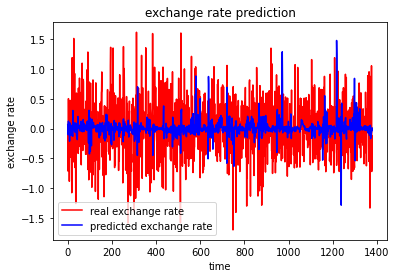

Tomorrow's exchange rate : [0.00834431] CAD/KRW


In [136]:
# 외국/한국 환율 , 한국과 외국의 단기 이자율 차이, 한국과 외국의 물가 상승률 차이, 한국과 외국의 통화량 상승률 차이, 한국과 외국의 GDP 차이

dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_df['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.24978596968323694, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [1.0561709260175527, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.7224004076616426, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.5475040257649009, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981]] -> [-0.12852169689118986]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 5)              200       
                                                                 
 lstm_7 (LSTM)               (None, 5)                 220       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                            

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-20 15:13:49.110116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:13:49.303701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:13:49.346231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:13:49.405727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:13:49.474192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 5s 11ms/step - loss: 0.4706
Epoch 2/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4645
Epoch 3/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4639
Epoch 4/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4634
Epoch 5/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4631
Epoch 6/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4632
Epoch 7/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4630
Epoch 8/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4627
Epoch 9/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4622
Epoch 10/600
322/322 [==============================] - 3s 11ms/step - loss: 0.4624
Epoch 11/600
322/322 [==============================] - 3s 10ms/step - loss: 0.4615
Epoch 12/600
322/322 [==============================] - 3s 11ms/step - loss: 0.4612
Epoch 13/600


322/322 [==============================] - 4s 12ms/step - loss: 0.3470
Epoch 195/600
322/322 [==============================] - 4s 12ms/step - loss: 0.3512
Epoch 196/600
322/322 [==============================] - 4s 12ms/step - loss: 0.3456
Epoch 197/600
322/322 [==============================] - 4s 12ms/step - loss: 0.3464
Epoch 198/600
322/322 [==============================] - 4s 11ms/step - loss: 0.3458
Epoch 199/600
322/322 [==============================] - 3s 11ms/step - loss: 0.3461
Epoch 200/600
322/322 [==============================] - 3s 11ms/step - loss: 0.3468
Epoch 201/600
322/322 [==============================] - 3s 10ms/step - loss: 0.3453
Epoch 202/600
322/322 [==============================] - 3s 10ms/step - loss: 0.3451
Epoch 203/600
322/322 [==============================] - 3s 10ms/step - loss: 0.3451
Epoch 204/600
322/322 [==============================] - 3s 10ms/step - loss: 0.3440
Epoch 205/600
322/322 [==============================] - 3s 10ms/step - loss: 0

322/322 [==============================] - 4s 13ms/step - loss: 0.3100
Epoch 387/600
322/322 [==============================] - 5s 14ms/step - loss: 0.3130
Epoch 388/600
322/322 [==============================] - 4s 13ms/step - loss: 0.3153
Epoch 389/600
322/322 [==============================] - 4s 12ms/step - loss: 0.3097
Epoch 390/600
322/322 [==============================] - 4s 13ms/step - loss: 0.3075
Epoch 391/600
322/322 [==============================] - 4s 12ms/step - loss: 0.3122
Epoch 392/600
322/322 [==============================] - 4s 13ms/step - loss: 0.3098
Epoch 393/600
322/322 [==============================] - 4s 13ms/step - loss: 0.3090
Epoch 394/600
322/322 [==============================] - 4s 13ms/step - loss: 0.3084
Epoch 395/600
322/322 [==============================] - 4s 13ms/step - loss: 0.3098
Epoch 396/600
322/322 [==============================] - 4s 13ms/step - loss: 0.3083
Epoch 397/600
322/322 [==============================] - 4s 13ms/step - loss: 0

322/322 [==============================] - 3s 10ms/step - loss: 0.2916
Epoch 579/600
322/322 [==============================] - 3s 10ms/step - loss: 0.2939
Epoch 580/600
322/322 [==============================] - 3s 10ms/step - loss: 0.2920
Epoch 581/600
322/322 [==============================] - 3s 10ms/step - loss: 0.2947
Epoch 582/600
322/322 [==============================] - 3s 10ms/step - loss: 0.2957
Epoch 583/600
322/322 [==============================] - 3s 10ms/step - loss: 0.2906
Epoch 584/600
322/322 [==============================] - 3s 10ms/step - loss: 0.2895
Epoch 585/600
322/322 [==============================] - 3s 10ms/step - loss: 0.2899
Epoch 586/600
322/322 [==============================] - 3s 10ms/step - loss: 0.2907
Epoch 587/600
322/322 [==============================] - 3s 10ms/step - loss: 0.2904
Epoch 588/600
322/322 [==============================] - 3s 10ms/step - loss: 0.2905
Epoch 589/600
322/322 [==============================] - 3s 10ms/step - loss: 0

2022-05-20 15:51:13.423035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:51:13.518569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:51:13.592655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


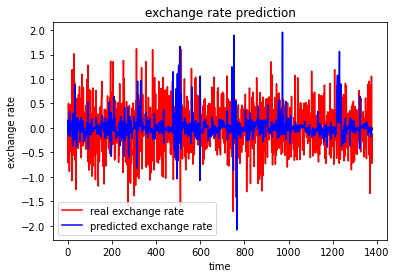

Tomorrow's exchange rate : [-0.03634199] CAD/KRW


In [137]:
dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 600
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=600, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_df['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.24978596968323694, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [1.0561709260175527, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.7224004076616426, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981], [-0.5475040257649009, -0.7087703227575981, -1.7204478215878567, -0.7087703227575981]] -> [-0.12852169689118986]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 5)              200       
                                                                 
 lstm_9 (LSTM)               (None, 5)                 220       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                            

2022-05-20 15:51:14.801262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:51:15.012133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:51:15.055557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:51:15.120091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 15:51:15.187855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 4s 10ms/step - loss: 0.4696
Epoch 2/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4646
Epoch 3/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4643
Epoch 4/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4637
Epoch 5/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4636
Epoch 6/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4633
Epoch 7/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4621
Epoch 8/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4624
Epoch 9/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4620
Epoch 10/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4614
Epoch 11/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4605
Epoch 12/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4599
Epoch 13/300


322/322 [==============================] - 3s 10ms/step - loss: 0.3172
Epoch 195/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3168
Epoch 196/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3166
Epoch 197/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3185
Epoch 198/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3194
Epoch 199/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3169
Epoch 200/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3156
Epoch 201/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3157
Epoch 202/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3159
Epoch 203/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3162
Epoch 204/300
322/322 [==============================] - 3s 10ms/step - loss: 0.3151
Epoch 205/300
322/322 [==============================] - 3s 10ms/step - loss: 0

2022-05-20 16:07:55.923746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 16:07:56.007886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 16:07:56.091614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


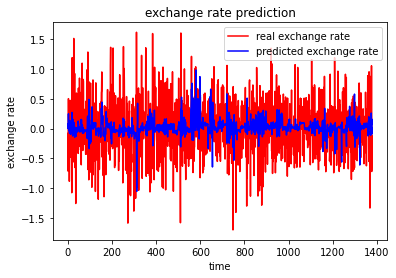

Tomorrow's exchange rate : [0.01760626] CAD/KRW


In [138]:
## 기본 'adam'
dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_df['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

###### lr = 0.0001

dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_df['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

## 활성화 함수 relu
dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='relu'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_df['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -0.7087703227575981, -195.44741844942823, -0.7087703227575981], [-0.24978596968323694, -0.7087703227575981, -195.44741844942823, -0.7087703227575981], [1.0561709260175527, -0.7087703227575981, -195.44741844942823, -0.7087703227575981], [-0.7224004076616426, -0.7087703227575981, -195.44741844942823, -0.7087703227575981], [-0.5475040257649009, -0.7087703227575981, -195.44741844942823, -0.7087703227575981]] -> [-0.12852169689118986]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 5)              200       
                                                                 
 lstm_5 (LSTM)               (None, 5)                 220       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                            

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-20 19:34:04.750340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 19:34:05.054456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 19:34:05.102129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 19:34:05.930160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 19:34:06.011854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 7s 13ms/step - loss: 0.0000e+00
Epoch 2/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 3/300
322/322 [==============================] - 4s 13ms/step - loss: 0.0000e+00
Epoch 4/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 5/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 6/300
322/322 [==============================] - 4s 13ms/step - loss: 0.0000e+00
Epoch 7/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 8/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 9/300
322/322 [==============================] - 4s 13ms/step - loss: 0.0000e+00
Epoch 10/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 11/300
322/322 [==============================] - 4s 13ms/step - loss: 0.0000e+00
Epoch 12/300
322/322 [==============================]

322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 95/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 96/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 97/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 98/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 99/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 100/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 101/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 102/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 103/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 104/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 105/300
322/322 [=================

322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 187/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 188/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 189/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 190/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 191/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 192/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 193/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 194/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 195/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 196/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 197/300
322/322 [============

322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 279/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 280/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 281/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 282/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 283/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 284/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 285/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 286/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 287/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 288/300
322/322 [==============================] - 4s 12ms/step - loss: 0.0000e+00
Epoch 289/300
322/322 [============

2022-05-20 19:53:44.491430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 19:53:44.577754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 19:53:44.646638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


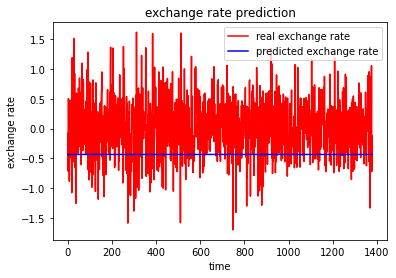

Tomorrow's exchange rate : [-0.43566918] CAD/KRW


In [36]:
## 손실함수 crossentropy

dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_df['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[-0.5475040257649009, -0.7087703227575981, -195.44741844942823, -0.7087703227575981]] -> [-0.12852169689118986]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 5)              200       
                                                                 
 lstm_7 (LSTM)               (None, 5)                 220       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-20 19:53:46.058828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 19:53:46.302192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 19:53:46.560303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 19:53:46.716521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 10/322 [..............................] - ETA: 3s - loss: 0.3315 

2022-05-20 19:53:46.949756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


322/322 [==============================] - 5s 11ms/step - loss: 0.4664
Epoch 2/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4647
Epoch 3/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4641
Epoch 4/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4642
Epoch 5/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4639
Epoch 6/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4637
Epoch 7/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4629
Epoch 8/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4629
Epoch 9/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4621
Epoch 10/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4619
Epoch 11/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4614
Epoch 12/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4614
Epoch 13/300


322/322 [==============================] - 3s 10ms/step - loss: 0.4385
Epoch 99/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4382
Epoch 100/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4380
Epoch 101/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4378
Epoch 102/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4380
Epoch 103/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4388
Epoch 104/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4388
Epoch 105/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4381
Epoch 106/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4385
Epoch 107/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4367
Epoch 108/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4366
Epoch 109/300
322/322 [==============================] - 3s 10ms/step - loss: 0.

322/322 [==============================] - 3s 10ms/step - loss: 0.4317
Epoch 195/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4344
Epoch 196/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4337
Epoch 197/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4327
Epoch 198/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4332
Epoch 199/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4323
Epoch 200/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4314
Epoch 201/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4322
Epoch 202/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4316
Epoch 203/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4328
Epoch 204/300
322/322 [==============================] - 3s 10ms/step - loss: 0.4339
Epoch 205/300
322/322 [==============================] - 3s 10ms/step - loss: 0

322/322 [==============================] - 4s 14ms/step - loss: 0.4272
Epoch 291/300
322/322 [==============================] - 5s 15ms/step - loss: 0.4276
Epoch 292/300
322/322 [==============================] - 5s 15ms/step - loss: 0.4286
Epoch 293/300
322/322 [==============================] - 5s 15ms/step - loss: 0.4273
Epoch 294/300
322/322 [==============================] - 5s 15ms/step - loss: 0.4262
Epoch 295/300
322/322 [==============================] - 5s 14ms/step - loss: 0.4277
Epoch 296/300
322/322 [==============================] - 5s 15ms/step - loss: 0.4249
Epoch 297/300
322/322 [==============================] - 5s 15ms/step - loss: 0.4274
Epoch 298/300
322/322 [==============================] - 5s 15ms/step - loss: 0.4272
Epoch 299/300
322/322 [==============================] - 5s 15ms/step - loss: 0.4257
Epoch 300/300
322/322 [==============================] - 5s 15ms/step - loss: 0.4309


2022-05-20 20:10:54.371118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 20:10:54.506145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-20 20:10:54.585774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


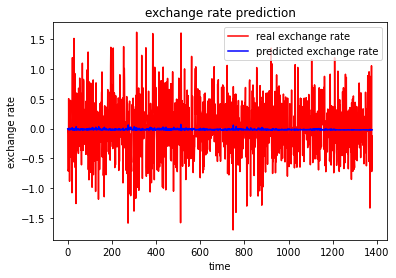

Tomorrow's exchange rate : [-0.02005529] CAD/KRW


In [37]:
dfx = merge_df[['ex', 'inf_spread', 'm1_spread', 'inf_spread']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 1
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_df['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')